<a href="https://colab.research.google.com/github/Audrey-ai/Football-Match-Results-Prediction/blob/main/FootBall_Analysis_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Defining the Question

### a) Specification of Data Analytical Question

As a football analyst for Mchezopesa Ltd the main task is to : 

Predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (rank should be included in training).


The main approach to use in analysis is Polynomial and Logistic regression.

### b) Defining the Metric for Success

The research will be considered a success if we are able to successfully Predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (rank should be included in training).


### c) Understanding the context 

The use of advanced big data analytic in soccer starts showing its potential,
however, sports analytics as a research area is still only emerging. Some of the
problems are well-defined, e.g. many studies have attempted to predict the result of soccer matches before the match actually started.

In our research, we take a complementary perspective. We consider the use of
predictive modeling to explain the outcome of a match based on the available
data from the match (rather than trying to predict the outcome of the game
before the game starts).The two main approaches to achieve this would be by use of Polynomial and Logistic regression algorithms.

### d) Recording the Experimental Design

Experimental design refers to how participants are allocated to the different conditions in a reaserch or experiment.
The experimental design used is **Independent measures design**, also known as between-groups,which is an experimental design where different participants are used in each condition of the independent variable.  This means that each condition of the experiment includes a different group of participants. 

### e) Data Relevance

The datasets we are using in our reaserch are relevant as it contains information on football matches played between two teams which are either home or away and the different scores for the matches.
We also have information on the dates the matches and the exact location for these matches.In general the variables selected for the dataset present a hig degree of data relevance.

#2. Reading and Checking of data

In [114]:
#Importing the relevant libraries to use in our reasecrh

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

In [115]:
#Loading the dataset on fifa rankings

Ranking = pd.read_csv('fifa_ranking.csv')
Ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [116]:
#Checking the shape of the dataset
Ranking.shape

(57793, 16)

In [117]:
#Cross-checking te column information
Ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [118]:
#Loading the dataset for results of matches

Results = pd.read_csv('results.csv')
Results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True


In [119]:
#Checking the shape of the dataset
Results.shape

(40839, 9)

In [120]:
#Cross-checking te column information
Results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


#3. Data Cleaning

3.a) Cleaning Ranking dataset

In [121]:
#Change date format from string to datetime
#
Ranking['rank_date'] = pd.to_datetime(Ranking['rank_date'])
Ranking.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rank                     57793 non-null  int64         
 1   country_full             57793 non-null  object        
 2   country_abrv             57793 non-null  object        
 3   total_points             57793 non-null  float64       
 4   previous_points          57793 non-null  int64         
 5   rank_change              57793 non-null  int64         
 6   cur_year_avg             57793 non-null  float64       
 7   cur_year_avg_weighted    57793 non-null  float64       
 8   last_year_avg            57793 non-null  float64       
 9   last_year_avg_weighted   57793 non-null  float64       
 10  two_year_ago_avg         57793 non-null  float64       
 11  two_year_ago_weighted    57793 non-null  float64       
 12  three_year_ago_avg       57793 n

In [122]:
# Create new month and year columns for rank date column
#

Ranking['month'] = Ranking['rank_date'].dt.month
Ranking['year'] = Ranking['rank_date'].dt.year

Ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,month,year
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8,1993


In [123]:
#Dropping columns that are not relevant 
#
Ranking_df = Ranking.drop(['country_abrv','total_points','previous_points','rank_change','cur_year_avg',
                      'cur_year_avg_weighted','last_year_avg','last_year_avg_weighted','two_year_ago_avg',
                      'two_year_ago_weighted','three_year_ago_avg','three_year_ago_weighted','confederation'],
                      axis='columns', inplace=True)

Ranking.head()                   

,rank,country_full,rank_date,month,year
0,1,Germany,1993-08-08,8,1993
1,2,Italy,1993-08-08,8,1993
2,3,Switzerland,1993-08-08,8,1993
3,4,Sweden,1993-08-08,8,1993
4,5,Argentina,1993-08-08,8,1993


3.b) Cleaning Results dataset

In [124]:
#Change date format from string to datetime
#
Results['date'] = pd.to_datetime(Results['date'])
Results.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40839 non-null  datetime64[ns]
 1   home_team   40839 non-null  object        
 2   away_team   40839 non-null  object        
 3   home_score  40839 non-null  int64         
 4   away_score  40839 non-null  int64         
 5   tournament  40839 non-null  object        
 6   city        40839 non-null  object        
 7   country     40839 non-null  object        
 8   neutral     40839 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.5+ MB


In [125]:
# Create new month and year columns for rank date column
#

Results['month'] = Results['date'].dt.month
Results['year'] = Results['date'].dt.year

Results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,11,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,3,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,3,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,1876


In [126]:
#Dropping city column in our Results dataset

Results_df = Results.drop(['city'],axis=1,inplace=True)
Results.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,month,year
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False,11,1872
1,1873-03-08,England,Scotland,4,2,Friendly,England,False,3,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False,3,1874
3,1875-03-06,England,Scotland,2,2,Friendly,England,False,3,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False,3,1876


3.c) Merging Datasets

3.c.a) Merging to create home_team dataset

In [127]:
Home_team = pd.merge(Results, Ranking,how='inner', left_on=['home_team','month','year'],
                     right_on=['country_full','month','year'])
Home_team.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,month,year,rank,country_full,rank_date
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,8,1993,19,Colombia,1993-08-08
1,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,False,8,1993,19,Colombia,1993-08-08
2,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,Colombia,False,8,1993,19,Colombia,1993-08-08
3,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False,8,1993,70,Peru,1993-08-08
4,1993-08-08,Peru,Colombia,0,1,FIFA World Cup qualification,Peru,False,8,1993,70,Peru,1993-08-08


In [128]:
#Dropping date and rank date columns

Home_Team_drop = Home_team.drop(['date','rank_date'],axis='columns',inplace=True)
Home_team

,home_team,away_team,home_score,away_score,tournament,country,neutral,month,year,rank,country_full
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,8,1993,19,Colombia
1,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,False,8,1993,19,Colombia
2,Colombia,Peru,4,0,FIFA World Cup qualification,Colombia,False,8,1993,19,Colombia
3,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False,8,1993,70,Peru
4,Peru,Colombia,0,1,FIFA World Cup qualification,Peru,False,8,1993,70,Peru
...,...,...,...,...,...,...,...,...,...,...,...
18604,Nigeria,Iceland,2,0,FIFA World Cup,Russia,True,6,2018,48,Nigeria
18605,Nigeria,Argentina,1,2,FIFA World Cup,Russia,True,6,2018,48,Nigeria
18606,Australia,Peru,0,2,FIFA World Cup,Russia,True,6,2018,36,Australia
18607,Senegal,Colombia,0,1,FIFA World Cup,Russia,True,6,2018,27,Senegal


In [129]:
#Renaming rank column to home_team rank
Home_team.rename(columns = {'rank' : 'home_rank'},inplace=True)
Home_team.head()

,home_team,away_team,home_score,away_score,tournament,country,neutral,month,year,home_rank,country_full
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,8,1993,19,Colombia
1,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,False,8,1993,19,Colombia
2,Colombia,Peru,4,0,FIFA World Cup qualification,Colombia,False,8,1993,19,Colombia
3,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False,8,1993,70,Peru
4,Peru,Colombia,0,1,FIFA World Cup qualification,Peru,False,8,1993,70,Peru


3.c.b)Final Dataset - Merging the home team rank with the ranking dataset to create final dataset

In [130]:
Match_results = pd.merge(Home_team, Ranking,how='inner', left_on=['away_team','month','year'],
                     right_on=['country_full','month','year'])
Match_results.head()

,home_team,away_team,home_score,away_score,tournament,country,neutral,month,year,home_rank,country_full_x,rank,country_full_y,rank_date
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,8,1993,19,Colombia,67,Paraguay,1993-08-08
1,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,8,1993,5,Argentina,67,Paraguay,1993-08-08
2,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,False,8,1993,19,Colombia,5,Argentina,1993-08-08
3,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False,8,1993,70,Peru,5,Argentina,1993-08-08
4,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,False,8,1993,67,Paraguay,5,Argentina,1993-08-08


In [131]:
#Dropping unnecessary columns
Match_results.drop(['country_full_x','country_full_y','rank_date','neutral'],axis='columns',inplace=True)
Match_results.head()

,home_team,away_team,home_score,away_score,tournament,country,month,year,home_rank,rank
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,8,1993,19,67
1,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,8,1993,5,67
2,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,8,1993,19,5
3,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,8,1993,70,5
4,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,8,1993,67,5


In [132]:
#Renaming rank column

Match_results.rename(columns = {'rank' : 'away_rank'},inplace=True)
Match_results.head()

,home_team,away_team,home_score,away_score,tournament,country,month,year,home_rank,away_rank
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,8,1993,19,67
1,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,8,1993,5,67
2,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,8,1993,19,5
3,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,8,1993,70,5
4,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,8,1993,67,5


In [133]:
#Checking the shape of our dataset
#
Match_results.shape

(16957, 10)

In [134]:
#Checking for missing values in our final dataset

Match_results.isnull().any()

#There are no missing values


home_team     False
away_team     False
home_score    False
away_score    False
tournament    False
country       False
month         False
year          False
home_rank     False
away_rank     False
dtype: bool

In [135]:
#Checking for duplicates in our data

Match_results.duplicated().any() #There are duplicates in our data
Match_results.drop_duplicates(inplace=True)

Match_results.head()


,home_team,away_team,home_score,away_score,tournament,country,month,year,home_rank,away_rank
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,8,1993,19,67
1,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,8,1993,5,67
2,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,8,1993,19,5
3,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,8,1993,70,5
4,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,8,1993,67,5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

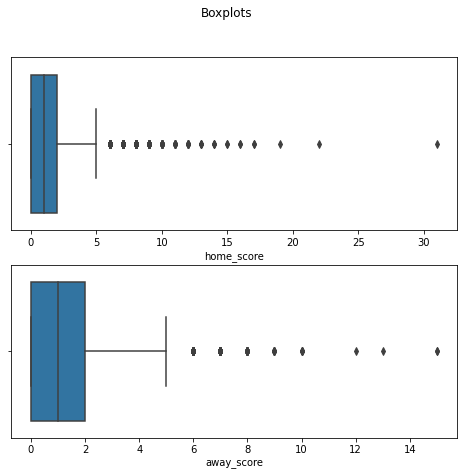

In [24]:
#Checking for outliers

Scores = ['home_score','away_score']

fig, ax = plt.subplots(len(Scores), figsize=(8,7))
fig.suptitle('Boxplots')

for i,col_val in enumerate(Scores):
    sns.boxplot(Match_results[col_val],ax=ax[i])

plt.show

3.c) Encoding tournament column

In [136]:
#Encoding our dataset on tournament columns

# Get dummies

Tournament = pd.get_dummies(Match_results['tournament'], prefix_sep='_', drop_first=True)
Tournament.head()


,AFC Asian Cup,AFC Asian Cup qualification,AFC Challenge Cup,AFC Challenge Cup qualification,AFF Championship,African Cup of Nations,African Cup of Nations qualification,African Nations Championship,Amílcar Cabral Cup,Baltic Cup,CECAFA Cup,CFU Caribbean Cup,CFU Caribbean Cup qualification,COSAFA Cup,Confederations Cup,Copa América,Copa América qualification,Copa Paz del Chaco,Copa del Pacífico,Cyprus International Tournament,Dragon Cup,Dunhill Cup,Dynasty Cup,EAFF Championship,FIFA World Cup,FIFA World Cup qualification,Friendly,Gold Cup,Gold Cup qualification,Gulf Cup,Intercontinental Cup,King Hassan II Tournament,King's Cup,Kirin Cup,Korea Cup,Lunar New Year Cup,Malta International Tournament,Merdeka Tournament,Millennium Cup,Nations Cup,Nehru Cup,Nile Basin Tournament,Nordic Championship,OSN Cup,Oceania Nations Cup,Oceania Nations Cup qualification,Pacific Games,Prime Minister's Cup,SAFF Cup,SKN Football Festival,Simba Tournament,South Pacific Games,Tournoi de France,UAFA Cup,UAFA Cup qualification,UEFA Euro,UEFA Euro qualification,UNCAF Cup,UNIFFAC Cup,USA Cup,United Arab Emirates Friendship Tournament,VFF Cup,WAFF Championship,Windward Islands Tournament
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [137]:
#Merging the Match_results and Friendly match columns
#

Match_results = pd.concat([Match_results, Tournament['Friendly']],axis=1)
Match_results.head()


,home_team,away_team,home_score,away_score,tournament,country,month,year,home_rank,away_rank,Friendly
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,8,1993,19,67,0
1,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,8,1993,5,67,0
2,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,8,1993,19,5,0
3,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,8,1993,70,5,0
4,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,8,1993,67,5,0


In [138]:
#Checking the shape of our dataset

Match_results.shape

(16864, 11)

#4. Exploratory Data Analysis


#a)Univariate Analysis

In [139]:
#Creating frequency tables for country,tournament and year

variables = ['country','tournament','year']

for variable in variables:
 print(variable)
 print(Match_results[variable].value_counts())

 

 #From the frequenct table below,
 #1. Most games have been hosted in the united states
 #2. Most matches are friendly matches
 #3. The year 2011 had most games played

country
United States               569
France                      319
South Africa                318
Qatar                       281
United Arab Emirates        269
                           ... 
U.S. Virgin Islands           1
Gibraltar                     1
Réunion                       1
Kosovo                        1
Turks and Caicos Islands      1
Name: country, Length: 210, dtype: int64
tournament
Friendly                                6408
FIFA World Cup qualification            3950
UEFA Euro qualification                 1383
African Cup of Nations qualification     871
AFC Asian Cup qualification              387
                                        ... 
OSN Cup                                    4
Dragon Cup                                 4
Copa del Pacífico                          4
Copa América qualification                 2
SKN Football Festival                      2
Name: tournament, Length: 65, dtype: int64
year
2011    867
2004    864
2008    862
2000    8

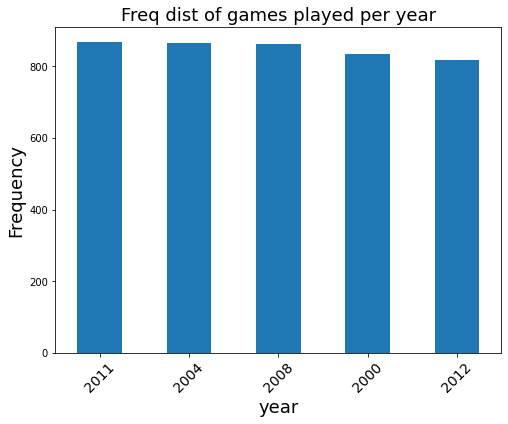

In [140]:
#Checking the top 5  years with most games played and ranked
#
#Bar plot on year

Match_results['year'].value_counts().head(5).plot.bar(figsize=(8,6))

plt.title('Freq dist of games played per year',size=18)
plt.xlabel('year',size=18)
plt.xticks(fontsize=14,rotation=45)
plt.ylabel('Frequency',size=18)
plt.show()



#the year that most games were played is 2011

In [141]:
#Summary of decriptive statistics for our scores numerical columns
#

Match_results[['home_score','away_score']].describe()

,home_score,away_score
count,16864.000000,16864.000000
mean,1.604602,1.069616
std,1.615972,1.245909
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,15.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


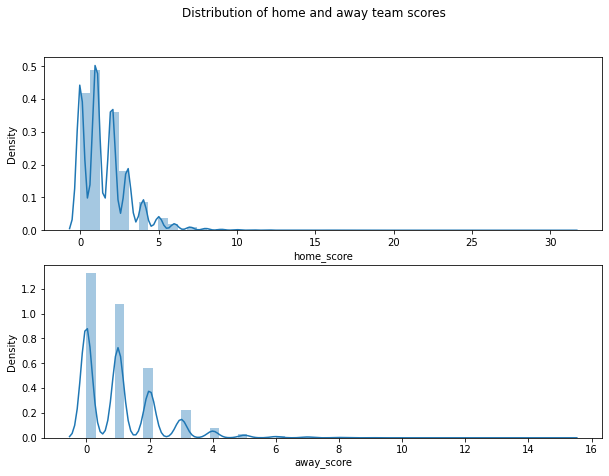

In [142]:
#Checking the distribution of home and away team scores
#

#Plotting the distribution
fig, ax = plt.subplots(len(Scores), figsize=(10,7))
fig.suptitle('Distribution of home and away team scores')

for i,col_val in enumerate(Scores):
    sns.distplot(Match_results[col_val],hist=True,ax=ax[i])

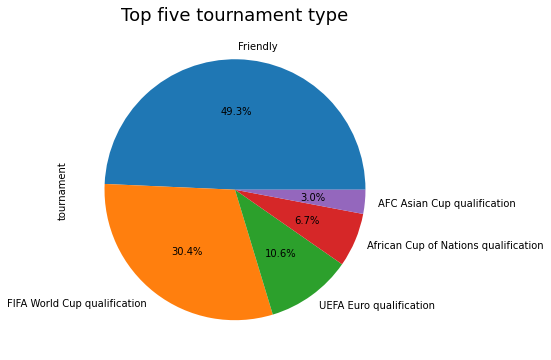

In [143]:
#Pie chart on tournament type
#

Match_results['tournament'].value_counts().head(5).plot.pie(figsize=(8,6),autopct='%1.1f%%')

plt.title('Top five tournament type',size=18)
plt.show()

#Most matches are friendly

#b) Bivariate Analysis

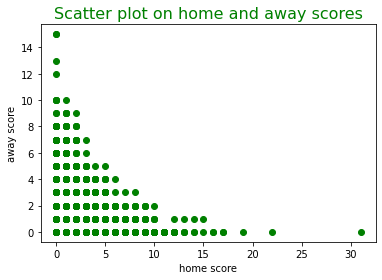

In [144]:
##Scatter plot to check the relationship between various variables

#Scatter plot to check on relation between home and away scores
plt.scatter(Match_results['home_score'],Match_results['away_score'], color='Green')
plt.title('Scatter plot on home and away scores',size=16,color='Green')
plt.xlabel('home score',size=10)
plt.ylabel('away score',size=10)
plt.show()

#Home and away scores have an inverse relationship


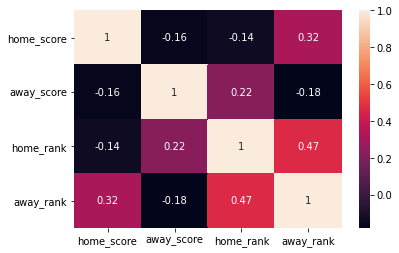

In [145]:
#Creating the correlation heatmap
#to check the relationship among number of differents variables

Var = ['home_score','away_score','home_rank','away_rank']
sns.heatmap(Match_results[Var].corr(),annot=True)
plt.show()

#There is little to no correlation among our variables but some correlation between home and away rank

Text(0, 0.5, 'Total Scores')

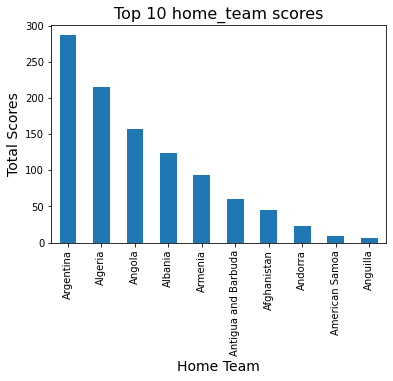

In [146]:
#Bar graph on home country scores

#First grouping the dataframe by the two variables
HomeGroup = Match_results.groupby(['home_team'])['home_score'].sum()

#Plotting our bar graph 
HomeGroup.head(10).sort_values(ascending=False).plot(kind='bar')

# labels and title
plt.title('Top 10 home_team scores',fontsize=16)
plt.xlabel('Home Team',fontsize=14)
plt.ylabel('Total Scores',fontsize=14)

#Argentina has the most home team scores

Text(0, 0.5, 'Away Team')

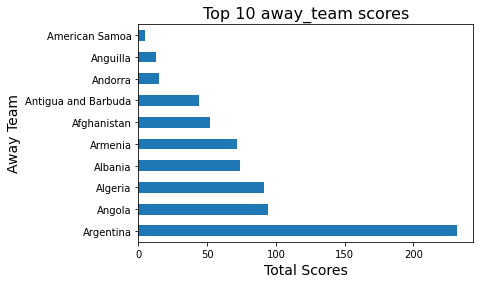

In [147]:
#Bar graph on away  country scores

#First grouping the dataframe by the two variables
AwayGroup = Match_results.groupby(['away_team'])['away_score'].sum()

#Plotting our bar graph 
AwayGroup.head(10).sort_values(ascending=False).plot(kind='barh')

# labels and title
plt.title('Top 10 away_team scores',fontsize=16)
plt.xlabel('Total Scores',fontsize=14)
plt.ylabel('Away Team',fontsize=14)

#Argentina still has the most away team scores

#c)Multivariate Analysis

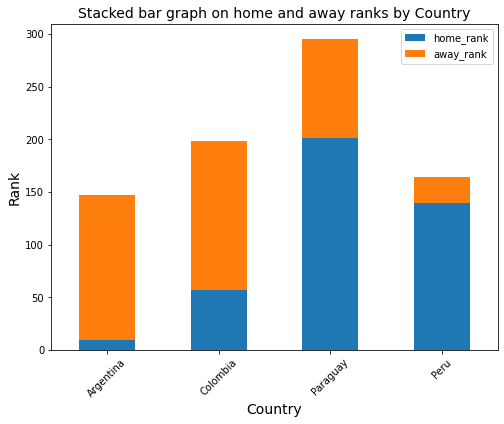

In [148]:
#Stacked bar chart on home and away ranks by country

Country = Match_results[['country','home_rank','away_rank']].head(10).groupby(['country']).sum()                             
Country.plot(kind='bar',figsize=(8, 6), stacked=True)

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title("Stacked bar graph on home and away ranks by Country", fontsize=14)

# Labeling our y axis
plt.ylabel("Rank", fontsize=14)

# Labeling our x axis
plt.xlabel("Country", fontsize=14)

# Displaying our chart
plt.show()


#4. Multicollinearity

In [149]:
#Creating dataframe of variables of interest
#
Independent_variables = Match_results[['home_score','away_score','home_rank','away_rank']]

# Let's display the correlations between the variables
correlations = Independent_variables.corr()

correlations

,home_score,away_score,home_rank,away_rank
home_score,1.000000,-0.163729,-0.135415,0.318738
away_score,-0.163729,1.000000,0.221711,-0.179898
home_rank,-0.135415,0.221711,1.000000,0.469472
away_rank,0.318738,-0.179898,0.469472,1.000000


The tabe above shows us how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. Across the independent variables we notice a negative to sligthly low relationship,and for away rank and home team rank there is a fair  degree of positive relationship between them.

In [151]:
#Checking VIF scores
#
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,home_score,away_score,home_rank,away_rank
home_score,1.259222,-0.008262,0.463670,-0.620529
away_score,-0.008262,1.180140,-0.466493,0.433943
home_rank,0.463670,-0.466493,1.635457,-0.999512
away_rank,-0.620529,0.433943,-0.999512,1.745094



 The VIF score for each variable is found alongside the downwards sloping diagonal. 
 
 Home_score has a score of 1.26, away_score has a score of 1.18, home_rank 1.63 and away_rank 1.75
The VIF scores are less than 5 thus te variables are okay to retain in our dataset.

# 5. Building the model

# a. Polynomial regression Approach

# a.1) Predictions for home team(Model 1)

In [152]:
#Split the dataset into train and test sets

X = Match_results[['home_rank','Friendly']].values
y = Match_results.iloc[:,2].values
print(X)
print(y)


[[19  0]
 [ 5  0]
 [19  0]
 ...
 [61  0]
 [ 5  0]
 [48  0]]
[0 0 2 ... 0 1 2]


In [153]:
# Split the dataset into train and test sets

X_train, Y_train, X_test, Y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [154]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [155]:
# We can get the predictions as an array for home team results
poly_arr_pred_Home = pol_reg.predict(poly_reg.fit_transform(X))
print(poly_arr_pred_Home)

[2.00906895 2.10402191 2.00906895 ... 1.74875161 2.10402191 1.82539229]


In [157]:
#Checking the accuracy of our predictions
#

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y, poly_arr_pred_Home))  
print('Mean Squared Error:', metrics.mean_squared_error(y, poly_arr_pred_Home))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, poly_arr_pred_Home))) 


#The RMSE shows the accuracy is not so good,we will try a different degree of polynomial regression

Mean Absolute Error: 1.1641411098692855
Mean Squared Error: 2.5486283388465902
Root Mean Squared Error: 1.5964424007293812


In [158]:
#Prediction using a polynomial degree of 3

# Fit polynomial Regression to the dataset
poly_reg3 = PolynomialFeatures(degree = 3) 
X_poly3 = poly_reg3.fit_transform(X)

pol_reg3 = LinearRegression()
pol_reg3.fit(X_poly3, y)


# We can get the predictions as an array for home team results
poly_arr_pred_Home3 = pol_reg3.predict(poly_reg3.fit_transform(X))
print(poly_arr_pred_Home3)

#Checking the accuracy of our predictions
#

print('Mean Absolute Error:', metrics.mean_absolute_error(y, poly_arr_pred_Home3))  
print('Mean Squared Error:', metrics.mean_squared_error(y, poly_arr_pred_Home3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, poly_arr_pred_Home3))) 

#The RMSE still shows th eaccuracy is not so good

[2.00428762 2.1912367  2.00428762 ... 1.6876058  2.1912367  1.7544264 ]
Mean Absolute Error: 1.1651100214481414
Mean Squared Error: 2.543439163355476
Root Mean Squared Error: 1.5948163415752536


In [159]:
#Prediction using a polynomial degree of 8

# Fit polynomial Regression to the dataset
poly_reg8 = PolynomialFeatures(degree = 8) 
X_poly8 = poly_reg8.fit_transform(X)

pol_reg8 = LinearRegression()
pol_reg8.fit(X_poly8, y)


# We can get the predictions as an array for home team results
poly_arr_pred_Home8 = pol_reg8.predict(poly_reg8.fit_transform(X))
print(poly_arr_pred_Home8)

#Checking the accuracy of our predictions
#

print('Mean Absolute Error:', metrics.mean_absolute_error(y, poly_arr_pred_Home8))  
print('Mean Squared Error:', metrics.mean_squared_error(y, poly_arr_pred_Home8))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, poly_arr_pred_Home8))) 



[1.97441658 2.0311079  1.97441658 ... 1.72830933 2.0311079  1.78016558]
Mean Absolute Error: 1.1618615265022707
Mean Squared Error: 2.5444319506799604
Root Mean Squared Error: 1.5951275656448172


The RMSE still shows the accuracy is not so good but it is better compared to 2 and 3 degrees
so we will retain the predictions at polynomial regression degree at 8

In [160]:
#Checking on our predictions

poly_arr_pred_Home8

array([1.97441658, 2.0311079 , 1.97441658, ..., 1.72830933, 2.0311079 ,
       1.78016558])

 # Cross Validation of our home team prediction model

In [162]:
#Cross Validation of our model

from sklearn.model_selection import KFold

folds = KFold(n_splits=5)

# Figuring out how many folds I set up using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  Y_train, Y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, Y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

#Mean RMSE value
print('*****************')
print(np.mean(RMSES))  #The mean RMSE is 1.594

#The RMSE value obtained for all models is slightly the same as the one obtained initially
#As you can tell from running the code,
#the RMSE value for our first and second model is fairly larger than the RMSE we found initially

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.6467707863281293

Training model 2
Model 2 Root Mean Squared Error: 1.8023864443453292

Training model 3
Model 3 Root Mean Squared Error: 1.5272756522537267

Training model 4
Model 4 Root Mean Squared Error: 1.5076792310350344

Training model 5
Model 5 Root Mean Squared Error: 1.4864308571430447
*****************
1.5941085942210529



The RMSE value obtained for all models(the mean of 1.594) is slightly the same as the one obtained initially
as you can tell from the output of running the code,
the RMSE value for our first and second model is fairly larger than the RMSE we found initially

# Residual and heteroscedasticity testing on home team predictions

A) Residual computation and testing

In [163]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(poly_arr_pred_Home8, y)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

print(residuals)
print('********************')
residuals.mean()

#Our mean residual is close to 0 as shown below, indicating that we tend to be fairly correct 


[ 1.97441658  2.0311079  -0.02558342 ...  1.72830933  1.0311079
 -0.21983442]
********************


1.69051051883573e-11

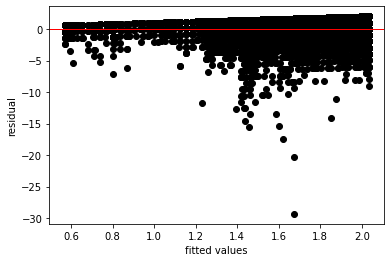

In [164]:
#Residual Plot
import matplotlib.pyplot as plt

plt.scatter(poly_arr_pred_Home8, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

#This does not look too bad: our residuals are centered around 
#a mean that is very close to 0 though there are ouliers butthere are no obvious patterns

B) Barlett's test for heteroscedasticity


In [165]:
#Heteroscedasticity test

import scipy as sp

test_result, p_value = sp.stats.bartlett(poly_arr_pred_Home8, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(poly_arr_pred_Home8)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


inf
the variances are homogeneous!


#a.2) Predictions for away team(Model 2)

In [175]:
#Split the dataset into train and test sets

X = Match_results[['away_rank','Friendly']].values
y = Match_results.iloc[:,3].values
print(X)
print(y)

[[67  0]
 [67  0]
 [ 5  0]
 ...
 [ 8  0]
 [22  0]
 [22  0]]
[0 0 1 ... 1 1 0]


In [176]:
# Split the dataset into train and test sets

X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [177]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [178]:
# We can get the predictions as an array for away team results
poly_arr_pred_Away = pol_reg.predict(poly_reg.fit_transform(X))
print(poly_arr_pred_Away)

[1.11010352 1.11010352 1.59861239 ... 1.57008354 1.44352592 1.44352592]


In [179]:
#Checking the accuracy of our predictions
#


print('Mean Absolute Error:', metrics.mean_absolute_error(y, poly_arr_pred_Away))  
print('Mean Squared Error:', metrics.mean_squared_error(y, poly_arr_pred_Away))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, poly_arr_pred_Away))) 

#The RMSE value is not so good,we will try predicting using a higher polynomial regression degree

Mean Absolute Error: 0.8981934997921928
Mean Squared Error: 1.4917427437135355
Root Mean Squared Error: 1.2213692085989132


In [180]:
#Using a polynomial regression of degree 7

# Fit polynomial Regression to the dataset
poly_reg7 = PolynomialFeatures(degree = 7) 
X_poly7 = poly_reg7.fit_transform(X)

pol_reg7 = LinearRegression()
pol_reg7.fit(X_poly7, y)

# We can get the predictions as an array for away team results
poly_arr_pred_Away7 = pol_reg7.predict(poly_reg7.fit_transform(X))
print(poly_arr_pred_Away7)

#Checking the accuracy of our predictions
#

print('Mean Absolute Error:', metrics.mean_absolute_error(y, poly_arr_pred_Away7))  
print('Mean Squared Error:', metrics.mean_squared_error(y, poly_arr_pred_Away7))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, poly_arr_pred_Away7))) 

##The RMSE still shows the accuracy is not so good but it is better compared to 2 degrees

[1.09805479 1.09805479 1.70987272 ... 1.6140187  1.35936763 1.35936763]
Mean Absolute Error: 0.8863577596733933
Mean Squared Error: 1.483842647156018
Root Mean Squared Error: 1.2181308005120048


In [181]:
#Checking on our predicted scores for away team
poly_arr_pred_Away7

array([1.09805479, 1.09805479, 1.70987272, ..., 1.6140187 , 1.35936763,
       1.35936763])

# Cross Validation of our away team prediction model model

In [182]:
#Cross Validation of our model

folds = KFold(n_splits=5)

# Figuring out how many folds I set up using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  Y_train, Y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, Y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

#Mean RMSE value
print('*****************')
print(np.mean(RMSES))  #The mean RMSE is 1.22 which is higher than the one found initially

#The RMSE value obtained for all models is slightly close to the one obtained initially
#As you can tell from running the code,
#the RMSE value for our third model is fairly larger than the RMSE we found initially

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.231789597833157

Training model 2
Model 2 Root Mean Squared Error: 1.2452296129995692

Training model 3
Model 3 Root Mean Squared Error: 1.2705359755979075

Training model 4
Model 4 Root Mean Squared Error: 1.190616770099075

Training model 5
Model 5 Root Mean Squared Error: 1.181264644729636
*****************
1.223887320251869


The RMSE value obtained for all models is slightly close to the one obtained initially.
As you can tell from the output on running the code,
the RMSE value for our third model is fairly larger than the RMSE we found initially.

#Residual and heteroscedasticity testing on away team predictions

In [183]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(poly_arr_pred_Away7, y)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

print(residuals)
print('********************')
residuals.mean()

#Our mean residual is close to 0 as shown below, indicating that we tend to be fairly correct 

[1.09805479 1.09805479 0.70987272 ... 0.6140187  0.35936763 1.35936763]
********************


1.564448128286185e-12

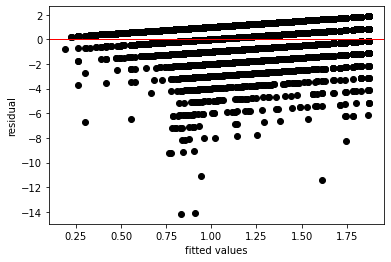

In [184]:
#Residual Plot
import matplotlib.pyplot as plt

plt.scatter(poly_arr_pred_Away7, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

#This does not look too bad: our residuals are centered around 
#a mean that is very close to 0 though  there are many outliers

#Barlett's test for heteroscedasticity

In [185]:
#Heteroscedasticity test

import scipy as sp

test_result, p_value = sp.stats.bartlett(poly_arr_pred_Away7, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(poly_arr_pred_Away7)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


#b. Logistic regression Approach

In [188]:
#Checking our data information
print(Match_results.shape)
Match_results.head()

(16864, 11)


,home_team,away_team,home_score,away_score,tournament,country,month,year,home_rank,away_rank,Friendly
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,8,1993,19,67,0
1,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,8,1993,5,67,0
2,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,8,1993,19,5,0
3,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,8,1993,70,5,0
4,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,8,1993,67,5,0


In [189]:
#Adding status column to our dataframe

#First creating a list of our conditions
conditions = [
    (Match_results['home_score'] > Match_results['away_score']),
    (Match_results['home_score'] < Match_results['away_score']),
    (Match_results['home_score'] == Match_results['away_score']),
    ]

# create a list of the values we want to assign for each condition
values = ['Win','Lose','Draw']

# create a new column and use np.select to assign values to it using our lists as arguments
Match_results['Status'] = np.select(conditions, values)


#Cross-checking our data to see if status column has been updated
Match_results.head()


,home_team,away_team,home_score,away_score,tournament,country,month,year,home_rank,away_rank,Friendly,Status
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,8,1993,19,67,0,Draw
1,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,8,1993,5,67,0,Draw
2,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,8,1993,19,5,0,Win
3,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,8,1993,70,5,0,Lose
4,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,8,1993,67,5,0,Lose


In [190]:
#Encoding the status column of either a win,lose or draw using label encoding

#First importing  labelencoder
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()

In [191]:
# apply le on categorical feature Status column

Match_results['Status_transform']=  le.fit_transform(Match_results['Status'])
Match_results.head()

,home_team,away_team,home_score,away_score,tournament,country,month,year,home_rank,away_rank,Friendly,Status,Status_transform
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,8,1993,19,67,0,Draw,0
1,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,8,1993,5,67,0,Draw,0
2,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,8,1993,19,5,0,Win,2
3,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,8,1993,70,5,0,Lose,1
4,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,8,1993,67,5,0,Lose,1


In [192]:
#Checking the shape of our dataset
Match_results.shape

(16864, 13)

In [193]:
# Splitting our dataset and performing data preprocessing
#
X = Match_results[['home_score','home_rank','Friendly']].values
y = Match_results['Status_transform'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=0)

In [194]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [195]:
#Checking accuracy of the model 

LogReg.score(X_test, y_test)

#The level of accuracy for our model is 0.6545 which is  at 65.45% which shows that is the percentage 
#Number of correct predictions our model will make from total number of predictions


0.6545454545454545

In [196]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)
y_pred

array([2, 2, 2, ..., 2, 2, 1])

In [197]:
# Evaluating the model
#Creating confusion matrix
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

#From the confusion matrix we see a total of 3312 correct predictions and 1748 predictions
#that are not correct
#There are 65.45% correct predictions from the Total predictions

array([[ 332,  577,  276],
       [ 279,  989,  124],
       [ 353,  139, 1991]])

#b.1)Hypeparameter Tuning-Logistic regression

#b.1.a)Grid Search

In [198]:
# Splitting our dataset and performing data preprocessing
#
X = Match_results[['home_score','home_rank','Friendly']].values
y = Match_results['Status_transform'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=0)

In [199]:
# Scaling our Data
# ---
# 
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [200]:
# Training and Cross Validation
# ---
# 
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)


from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)
all_accuracies


#This is the accuracy for the five folds and we notice slightly lower results with fourth fold
#with high accuracy of 0.6345 that is 63.45%


array([0.63193562, 0.6103346 , 0.6145701 , 0.63447692, 0.62711864])

In [202]:
# Printing the accuracies returned for five folds 
# by the cross_val_score method by calling print on all_accuracies
# ---
#
print(all_accuracies.mean())

#The accuracy mean for the five folds is 62.37%

0.6236871765052154


In [203]:
# Step 1: Hyperparameters: Getting Started with Grid Search
# 

grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [204]:
# Step 2: Instantiating GridSearchCV object
# 

from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [205]:
# Step 3: Calling the fit method
# 

gd_sr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=300, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [63]:
# Step 4: Checking the parameters that return the highest accuracy
# --- 
# To do so, we print the sr.best_params_ attribute of the GridSearchCV object, as shown below:
# ---
# 
best_parameters = gd_sr.best_params_
print(best_parameters)

# The result shows that the highest accuracy is achieved 
# when the n_estimators are 100, bootstrap is True and criterion is "gini". 
# It would be a good idea to add more number of estimators 
# and see if performance further increases since the highest 
# allowed value of n_estimators was chosen.

{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 100}


In [206]:
# Step 5: Finding the obtained accuracy
# ---
# The last and final step of Grid Search algorithm is 
# to find the accuracy obtained using the best parameters. 
# Previously we had a mean accuracy of 62.50%.
# To find the best accuracy achieved, we execute the following code:
# ---
# 
best_result = gd_sr.best_score_
print(best_result)

# The accuracy achieved is: 0.6251 of 62.51% which is only slightly better than 62.37. 
# To improve this further, it would be good to test values for other parameters 
# of Random Forest algorithm to see if the accuracy further improves or not.

0.6251274955311954


#b.1.b) Random Search

In [207]:
#The initial accuracy obtained while training and cross validating our data was as shown below

#This is the accuracy for the five folds and we notice slightly same results

print(all_accuracies)


#The accuracy mean for the five folds is 62.37% as shown below
print(all_accuracies.mean())

#Proceeding to  Random Forest algorithm to see if the accuracy further improves or not

[0.63193562 0.6103346  0.6145701  0.63447692 0.62711864]
0.6236871765052154


In [208]:
# Step 1: Hyperparameters: Getting Started with Random Search
# specify parameters and distributions to sample from
from scipy.stats import randint as sp_randint
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [209]:
# Step 2: Instantiating RandomizedSearchCV object 
# ---
# 
from sklearn.model_selection import RandomizedSearchCV 
random_sr = RandomizedSearchCV(classifier, param_dist, cv = 5) 

In [ ]:
# Step 3: Calling the fit method
# ---
#
random_sr.fit(X_train, y_train)

In [211]:
# Step 4: Checking the parameters that return the highest accuracy
# ---
#
best_parameters = random_sr.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 2, 'min_samples_split': 2}


In [212]:
# Finding the obtained accuracy
# --
# 
best_result = random_sr.best_score_
print(best_result)

#Comparing the accuracy result with that obtained using Grid Search algorithm of 62.51%
#The accuracy is a bit better at 65.95% as compared to 62.37% of the model and of grid search algorithm


0.6595224301681994


In general the accuracy obtained by both grid search(62.51%) and random forest(65.95%) algorithms are better than the accuracy obtained while cross-validating the dataset(62.37%)

However the random forest alogorithm improves the accuracy better compared to grid search.

#6. Challenging the solution

The reaserch was a success as we could be able to make predictions of results for home and away teams using both polynomial and logistic approach.However the results could be improved if we had more features that could help us predict the results of a game.

Otherwise we can note the below:


1.The data we used for our research was appropriate to achieve the results.


2.The reaserch was a success as we were able to predict the results of a game based on who is home and who is away.